In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1.)
Consider the data set for four points with features $x_i=(x_{i1},x_{i2})$ and binary class labels $y_i=\pm 1$.

[-0.25, 2.25, -0.25, 2.25]

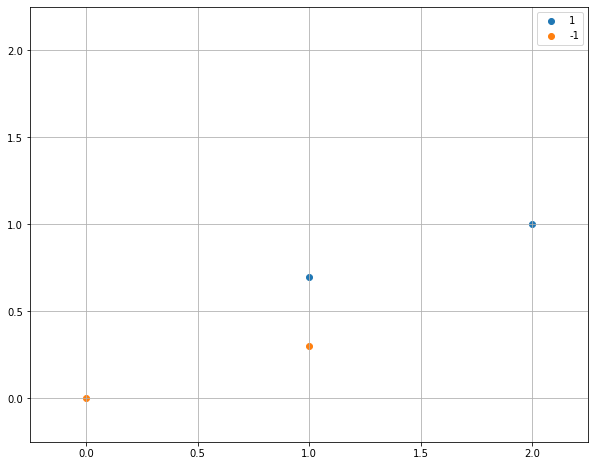

In [2]:
data = np.array([
    [0,0,-1],
    [1,.3,-1],
    [1,.7,1],
    [2,1,1]
])
label_1 = data[:,-1]==1
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.scatter(data[:,0][label_1],data[:,1][label_1], label='1')
plt.scatter(data[:,0][~label_1],data[:,1][~label_1], label='-1')
plt.legend()
plt.grid()
plt.axis([-.25,2.25,-.25,2.25],'equal')

(a) Find a linear classifier that separates the two classes.
Your classifier should be of the form

$$\hat{y} = \begin{cases}
        1 & \mbox{if } b + w_1 x_1 + w_2 x_2 > 0 \\
        -1 & \mbox{if } b + w_1 x_1 + w_2 x_2 < 0
    \end{cases}$$
    
State the intercept $b$ and weights $w_1$ and $w_2$ for your classifier.
Note there is no unique answer as there are multiple linear classifiers
that could separate the classes.

[-0.25, 2.25, -0.25, 2.25]

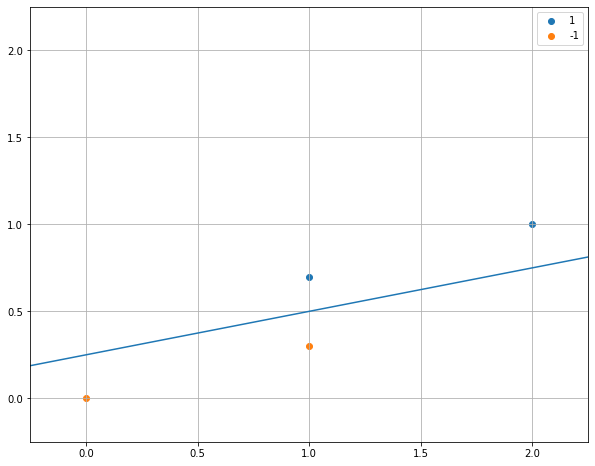

In [3]:
w1, w2, b = -1, 4, -1
decision_func = lambda x: - (w1/w2) * x - b/w2
xvals = np.linspace(-5, 5, 5)
plt.scatter(data[:,0][label_1],data[:,1][label_1], label='1')
plt.scatter(data[:,0][~label_1],data[:,1][~label_1], label='-1')
plt.plot(xvals, decision_func(xvals))
plt.legend()
plt.grid()
plt.axis([-.25,2.25,-.25,2.25],'equal')


(b) Find the maximum $\gamma$ such that

$$y_i(b+w_1x_{i1} + w_{i2}x_{i2}) \geq \gamma, \mbox{ for all } i,$$

for the classifier in part (a)?

In [4]:
margins = data[:, 2] * (b + w1 * data[:, 0] + w2* data[:, 1])
gamma = margins.min()
print(f'unnormalised margins : {margins}')
print(f'maximum unnorm. margin : {gamma:.4}')

unnormalised margins : [1.  0.8 0.8 1. ]
maximum unnorm. margin : 0.8


(c) Compute the margin of the classifier

$m = \frac{\gamma}{||w||}, \quad ||w||= \sqrt{ w_1^2 + w_2^2 }$

In [5]:
w_l2_norm = np.sqrt(w1**2+w2**2)
m = gamma/w_l2_norm
print(f'{m:.4}')

0.194


(d) Which samples $i$ are on the margin for your classifier?

## 2)
Consider the data set with scalar features $x_i$
and binary class labels $y_i=\pm 1$.

In [6]:
data = np.array([
    [0, -1],
    [1.3, -1],
    [2.1, -1],
    [2.8, 1],
    [4.2, -1],
    [5.7, 1],
])

[-0.1, 6, -1.2, 1.2]

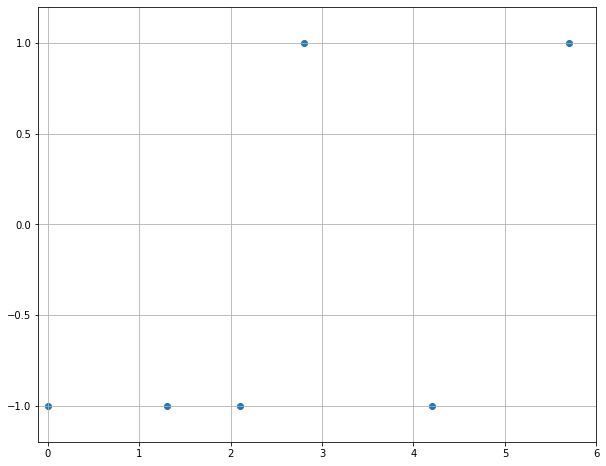

In [7]:
plt.scatter(data[:, 0], data[:, 1])
plt.grid()
plt.axis([-.1,6,-1.2,1.2],'equal')

Consider a linear classifier for this data of the form,

$$
    \hat{y} = \begin{cases}
        1  & z > 0 \\
        -1 & z < 0,
        \end{cases}
    \quad
    z = x-t,
$$

where $t$ is a threshold.  For each threshold $t$, let $J(t)$
denote the sum hinge loss,

$$
    J(t) = \sum_i \epsilon_i, \quad \epsilon_i = \max(0, 1-y_iz_i).
$$

**Question for Lab**

*(a)* Write a short python program to plot $J(t)$ vs. $t$ for
100 values of $t$ in the interval $t \in [0,5]$.

In [8]:
# TODO:

(b) Based on the plot, what is one value of $t$ that minimizes
$J(t)$.

(c) For the value of $t$ in part (b), find the corresponding
slack variables $\epsilon_i$.

(d) Which samples $i$ violate the margin ($\epsilon_i > 0$)
and which samples $i$ are misclassified ($\epsilon_i > 1$).

## 3)
Consider an image recognition problem, where an image $\mathbf{X}$
and filter $\mathbf{W}$ are $4 \text{x} 4$ matrices:

$$
    \mathbf{X} = \left[
        \begin{array}{cccc}
        0 & 0 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 1 & 0
        \end{array} \right], \quad
    \mathbf{W} = \left[
        \begin{array}{cccc}
        0 & 0 & 0 & 0 \\
        0 & 1 & 1 & 0 \\
        0 & 1 & 1 & 0 \\
        0 & 0 & 0 & 0
        \end{array} \right].
$$

In [9]:
X, W = np.zeros((4,4)), np.zeros((4,4))
X[1:, 2] = 1
W[1:3, 1:3] = 1

*(a)* Recall that in linear classification, the $4 \text{x} 4$
image matrices $\mathbf{X}$ and $\mathbf{W}$
can be represented as 16-dimensional vectors, $\mathbf{x} = \mathrm{vec}(\mathbf{X})$
and $\mathbf{w} = \mathrm{vec}(\mathbf{W})$ by stacking the columns of the matrices
vertically. What are $\mathbf{x}$ and $\mathbf{w}$ for the matrices above.

*(b)* What is the inner product $z = \mathbf{w}^\top \mathbf{x}$.

*(c)* What is the inner product $z = \mathbf{w}^\top \mathbf{x}_{\rm right}$ where
$\mathbf{x}_{\rm right}$ is
the vector corresponding to the matrix $\mathbf{X}$ right shifted by one pixel
with the left column filled with zeros.

*(d)* What is the inner product $z = \mathbf{w}^\top \mathbf{x}_{\rm left}$ where
$\mathbf{x}_{\rm left}$ is
the vector corresponding to the matrix $\mathbf{X}$ left shifted by one pixel
with the right column filled with zeros.

**Question for Lab**

*(e)*  Write the python command that can covert a $4 \text{x} 4$ image matrix, `Xmat`
to the 16-dimensional vector, `x`.  What is the python command
to go from `x` to `Xmat`.

## 4)
Consider the data set with scalar features $x_i$
and binary class labels $y_i=\pm 1$.

[-0.2, 3.2, -1.2, 1.2]

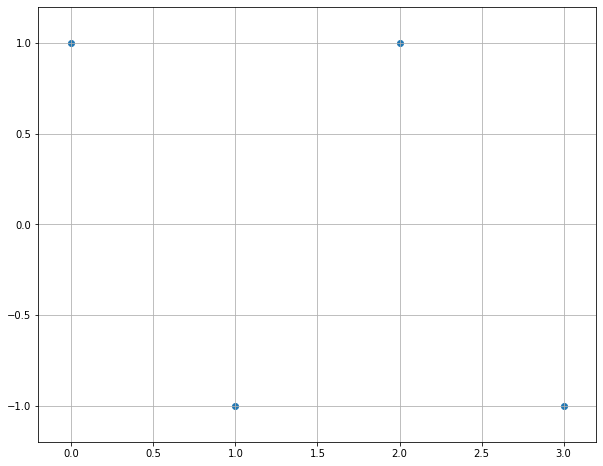

In [10]:
x = np.array([0,1,2,3.])
y = np.array([1,-1,1,-1])
plt.scatter(x, y)
plt.grid()
plt.axis([-0.2,3.2,-1.2,1.2],'equal')

A support vector classifier is of the form

$$
    \hat{y} = \begin{cases}
        1  & z > 0 \\
        -1 & z < 0,
        \end{cases}
    \quad
    z = \sum_i \alpha_i y_i K(x_i,x),
$$

where $K(x,x')$ is the radial basis function, $K(x,x') = e^{-\gamma(x-x')^2}$, and
$\gamma > 0$ and $\mathbf{\alpha} = [\alpha_1,\ldots,\alpha_4]$ are parameters of the classifier.

**Questions for LAB**

*(a)* \item Use python to plot $z$ vs. $x$ and
$\hat{y}$ vs. $x$ when $\gamma = 3$ and $\mathbf{\alpha} = [0,0,1,1]$.

*(b)* Repeat (a) with $\gamma = 0.3$ and $\mathbf{\alpha} = [1,1,1,1]$.

*(c)* Which classifier makes more errors on the training data.